In [1]:
# sth about optimization using GD...
# batch, minibatch, SGD..
# simuated annealing..

In [2]:
# polynomial regression
import numpy as np
m = 100
X = 6*np.random.rand(m, 1)-2
y = 0.5*X**2+ X + 2 + np.random.randn(m, 1)
X

array([[  2.51272158e+00],
       [  1.86541816e-01],
       [  1.38155657e+00],
       [  5.89272637e-01],
       [  3.71413331e+00],
       [  9.76443530e-01],
       [  9.26502809e-01],
       [ -5.43566367e-01],
       [  2.24964634e-01],
       [  1.45955147e+00],
       [ -4.04236969e-01],
       [ -1.20418417e+00],
       [  2.84801626e+00],
       [  9.54759312e-01],
       [ -1.35026847e+00],
       [ -1.77206469e+00],
       [  3.34174461e+00],
       [  1.42088376e+00],
       [  3.13565092e-01],
       [  3.97304003e+00],
       [ -1.12879024e+00],
       [  3.19434276e+00],
       [  3.95595433e+00],
       [  1.41801329e-01],
       [ -8.03526217e-01],
       [  1.55906002e+00],
       [  3.95726181e+00],
       [  3.56045949e+00],
       [ -1.29516787e+00],
       [ -1.86692489e+00],
       [ -1.49350397e+00],
       [  1.74933197e+00],
       [  7.80440168e-01],
       [  2.29468910e+00],
       [  1.27452111e+00],
       [  8.33257866e-01],
       [  2.43699801e+00],
 

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[  2.51272158e+00,   6.31376972e+00,   1.58647454e+01],
       [  1.86541816e-01,   3.47978492e-02,   6.49125399e-03],
       [  1.38155657e+00,   1.90869855e+00,   2.63697502e+00],
       [  5.89272637e-01,   3.47242241e-01,   2.04620351e-01],
       [  3.71413331e+00,   1.37947862e+01,   5.12356750e+01],
       [  9.76443530e-01,   9.53441967e-01,   9.30982240e-01],
       [  9.26502809e-01,   8.58407455e-01,   7.95316918e-01],
       [ -5.43566367e-01,   2.95464396e-01,  -1.60604508e-01],
       [  2.24964634e-01,   5.06090867e-02,   1.13852547e-02],
       [  1.45955147e+00,   2.13029050e+00,   3.10926863e+00],
       [ -4.04236969e-01,   1.63407527e-01,  -6.60553634e-02],
       [ -1.20418417e+00,   1.45005952e+00,  -1.74613871e+00],
       [  2.84801626e+00,   8.11119659e+00,   2.31008198e+01],
       [  9.54759312e-01,   9.11565345e-01,   8.70325502e-01],
       [ -1.35026847e+00,   1.82322494e+00,  -2.46184314e+00],
       [ -1.77206469e+00,   3.14021327e+00,  -5.5646610

In [4]:
# now we can use a linear reg model to fit the x_poly which already contain higher dimension features

In [5]:
# how do we know whether the model is overfitting or underfitting the data?? corss validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)
    train_errors, val_errors = [], []
    for m in range(len(X)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        print(y_train_predict)
        
        y_val_predict = model.predict(X_val[:m])
        print(y_val_predict)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-", linewidth = 2, label = 'train_error')
    plt.plot(np.sqrt(val_errors), "b*", linewidth = 2, label = "val_error")
    plt.xlabel("training size", fontsize = 16)
    plt.ylabel("error" , fontsize = 16)
    plt.title("error with respect to training size", fontsize = 16)
    plt.legend()
        

In [12]:
# decision boundaries
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

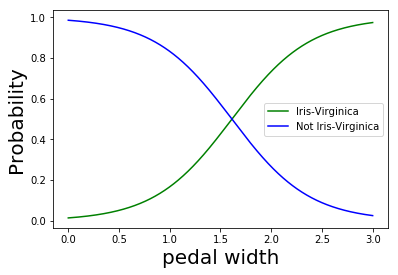

In [40]:
# lets look at the modles estimated probabilities for flowers with petal widths varying from 0 o 3cm
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b-", label = "Not Iris-Virginica")
plt.xlabel("pedal width", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.legend()
plt.show()

In [45]:
# predict_proba and predict function: first predicts the probability of data beloning to certain class
# second returns the predicted class given the input using a prediction rule (50% probability here)
log_reg.predict([[1.8], [1.4]])

array([1, 0])